In [1]:
using PyPlot
include("./src/fdfd.jl");
include("./src/yeeder.jl");
include("./src/calcpml_2d.jl");

In [2]:
num_trials = 1;
ns = (200:20:4000);
N = length(ns);
times = zeros(N,num_trials);

In [3]:
for j in (1:num_trials)
    for i in (1:N)
        println(j/num_trials*100);
        println(i);
        n = div(Int(ns[i]),1);
        tic();
        BC = [0,0];
        Nx2 = n;          
        Ny2 = n;
        Nx = div(Nx2,2);     Ny = div(Ny2,2);
        ER2  = ones(Complex64,Nx2,Ny2);
        ER2[div(Nx2*1,3):div(Nx2*2,3),div(Ny2*1,3):div(Ny2*2,3)] = 7.0;
        MUR2 = ones(Complex64,Nx2,Ny2);
        RES  = [1e-9,1e-9];
        NPML = [40 40 40 40]
        lambda0 = 50e-9;
        Pol = "Ez";
        theta = 0;
        Q = zeros(Int,Nx,Ny);
        Q[40:Nx-40,40:Ny-40] = 1;
        (Ex,Ey,Ez,Hx,Hy,Hz) = fdfd(ER2,MUR2,RES,NPML,BC,lambda0,Pol,theta,Q);
        time = toc();
        times[i,j] = time;
    end
end

100.0
100.0
1
elapsed time: 2.013560118 seconds
100.0
2
elapsed time: 0.195713749 seconds
100.0
3
elapsed time: 0.195155911 seconds
100.0
4
elapsed time: 0.286943307 seconds
100.0
5
elapsed time: 0.35925868 seconds
100.0
6
elapsed time: 0.385238549 seconds
100.0
7
elapsed time: 0.432158283 seconds
100.0
8
elapsed time: 0.467721648 seconds
100.0
9
elapsed time: 0.569665642 seconds
100.0
10
elapsed time: 0.591606219 seconds
100.0
11
elapsed time: 0.78021976 seconds
100.0
12
elapsed time: 0.771319495 seconds
100.0
13
elapsed time: 0.841583335 seconds
100.0
14
elapsed time: 1.029902168 seconds
100.0
15
elapsed time: 0.972421705 seconds
100.0
16
elapsed time: 1.045107033 seconds
100.0
17
elapsed time: 1.230978055 seconds
100.0
18
elapsed time: 1.34763904 seconds
100.0
19
elapsed time: 1.474090946 seconds
100.0
20
elapsed time: 1.544258239 seconds
100.0
21
elapsed time: 1.837789519 seconds
100.0
22
elapsed time: 1.714241338 seconds
100.0
23
elapsed time: 1.775720581 seconds
100.0
24
elapsed 

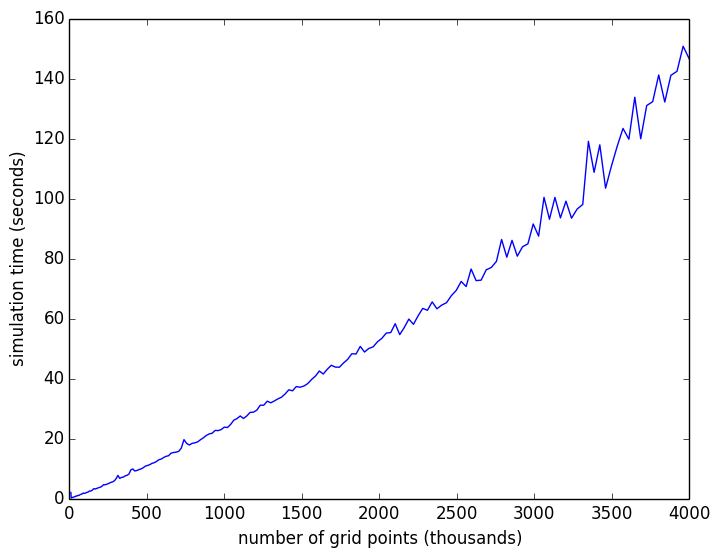

PyObject <matplotlib.text.Text object at 0x324b6ed50>

In [4]:
plot((ns.*ns/4)/1000,times)
xlabel("number of grid points (thousands)")
ylabel("simulation time (seconds)")